# Transactions Fraud Detection

**Authors:** [Peter Macinec](https://github.com/pmacinec), [Timotej Zatko](https://github.com/timzatko)

## Baseline model

At this jupyter notebook, baseline model will be trained on both, original data and balanced data. Also, *Recursive Feature Elimination with Cross-Validation (RFECV)* will be used for feature selection.

Because decision tree turned out to be the best choice in model selection phase, decision tree algorithm will be used for all baseline model combinations.

This setup will be then used to compare the results and performance of nature inspired algorithms used for feature selection.

### Setup and reading the data

At first, we need to import libraries and set initial configs.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

from src.dataset import load_processed_data
from src.data_balancing import random_undersample
from src.evaluation import custom_classification_report

In [3]:
x_train, y_train, x_test, y_test = load_processed_data()

Number of records:
  x_train - 472432
  y_train - 472432
  x_test - 118108
  y_test - 118108


Data will be balanced using random undersampling method:

In [4]:
%%time
x_train_undersampled, y_train_undersampled = random_undersample(x_train, y_train)
len(x_train_undersampled), len(y_train_undersampled)

CPU times: user 782 ms, sys: 478 ms, total: 1.26 s
Wall time: 1.31 s


(32842, 32842)

### Baseline model - original data

As first baseline model, decision tree will be trained on original data without balancing (only `class_weight` parameter is set to `balanced`):

#### All features

In [5]:
%%time

clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf = clf.fit(x_train, y_train)

CPU times: user 1min 5s, sys: 537 ms, total: 1min 6s
Wall time: 1min 18s


not fraud
precision: 0.984683751075826
recall: 0.9837765747426978
f1-score: 0.9842299538705302
support: 113971


is fraud
precision: 0.5641206977840642
recall: 0.5784384819917815
f1-score: 0.5711898794605561
support: 4137


accuracy: 0.969578690689877


macro avg
precision: 0.7744022244299451
recall: 0.7811075283672396
f1-score: 0.7777099166655432
support: 118108


weighted avg
precision: 0.9699525783231926
recall: 0.969578690689877
f1-score: 0.9697622904791083
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.7744022244299451




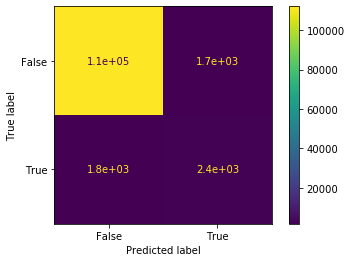

In [6]:
custom_classification_report(clf, x_test, y_test)

### Baseline model - balanced data

Next baseline models, decision tree will be trained on balanced data (using random undersampling):

#### All features

In [7]:
%%time
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train_undersampled, y_train_undersampled)

CPU times: user 2.32 s, sys: 0 ns, total: 2.32 s
Wall time: 2.74 s


not fraud
precision: 0.7738482075421987
recall: 0.9907129445362656
f1-score: 0.8689542274181858
support: 88941


is fraud
precision: 0.8052805280528053
recall: 0.11711866150101141
f1-score: 0.20449579454637973
support: 29167


accuracy: 0.7749771395671758


macro avg
precision: 0.7895643677975019
recall: 0.5539158030186385
f1-score: 0.5367250109822828
support: 118108


weighted avg
precision: 0.7816104801429783
recall: 0.7749771395671758
f1-score: 0.7048649268494523
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.789564367797502


CPU times: user 629 ms, sys: 68.1 ms, total: 697 ms
Wall time: 1.05 s


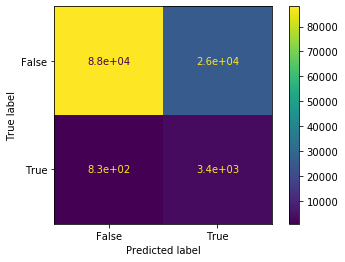

In [8]:
%%time
custom_classification_report(clf, x_test, y_test)

#### Feature selection (RFECV)

In [ ]:
%%time
rfecv = RFECV(estimator=clf, scoring='roc_auc', n_jobs=-1)
rfecv.fit(x_train_undersampled, y_train_undersampled)

print(f'Optimal number of features: {rfecv.n_features_}')

plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('CV score (roc auc)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
%%time
custom_classification_report(rfecv.estimator_, x_test, y_test)

### Conclusion

In this jupyter notebook, baseline models have been trained. Those baselines will be used for comparison with models trained only on features received from feature selection using nature inspired algorithms.